<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/ejer_22_11_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

###  Librerías y carga de datos

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [56]:
data = pd.read_csv("https://drive.google.com/uc?id=1fMmyhTvj8RAJxMdFtI7zB5j8egQKx30O")


In [57]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

### Visualizar Datos

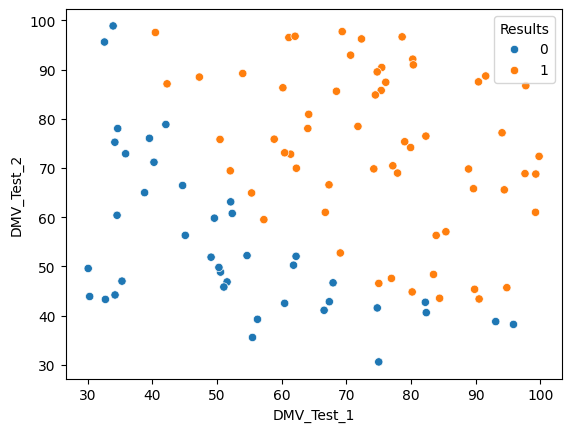

In [58]:
sns.scatterplot(x = 'DMV_Test_1', y = 'DMV_Test_2', hue = 'Results', data =data)

plt.show();

### Definimos de la función logística $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

### Cálculo de la Función de Coste  $J(\theta)$ y el Gradiente

En la regresión Logística debemos minimizar la función de coste

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

Siendo el gradiente de esta función de coste:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

Podemos observar que la expresión es de la misma forma que la utilizada eb la regresión lineal, que en forma vectorial se puede escribir de la forma:

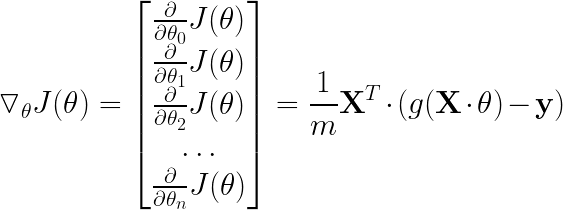

In [59]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

In [60]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -(1 / m) * sum(error)
    return cost

In [61]:
def compute_grad(theta, x, y):
  m = len(y)
  y_pred = logistic_function(np.dot(x , theta))
  grad = 1 / m *(np.dot(x.transpose(), (y_pred - y)))
  return grad

### Formamos matriz XX,vector y  theta_inicial

In [62]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

In [63]:
#mean_scores = np.mean(scores, axis=0)
#std_scores = np.std(scores, axis=0)
#scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)
theta_init = np.zeros((cols + 1, 1))


In [64]:
X.shape,y.shape,theta_init.shape

((100, 3), (100, 1), (3, 1))

In [65]:
X[0:4,:],y[0:4,:],theta_init[0:4,:]

(array([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ]]),
 array([[0],
        [0],
        [0],
        [1]]),
 array([[0.],
        [0.],
        [0.]]))

In [66]:
cost = compute_cost(theta_init, X, y)
gradient = compute_grad(theta_init, X, y)
print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization [0.69314718]
Gradient at initialization: [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


### Gradiente Descendente

Minimizamos la función de coste $J(\theta)$  actualizando la siguiente ecuación (algoritmo del gradiente descendente) repitiendo hasta convergencia :  
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$    
 (actualizar simultaneamente $\theta_j$ para todo $j$)

In [67]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []

    for i in range(iterations):
        cost= compute_cost(theta, x, y)
        gradient = compute_grad(theta, x, y)
        theta = theta - (alpha * gradient)
        if i % 10000 == 0:
            print("Iteration", i, "Cost:", cost)
        costs.append(cost)
    return theta, costs

In [68]:
theta_init

array([[0.],
       [0.],
       [0.]])

In [69]:
theta, costs = gradient_descent(X, y, theta_init, 0.001, 200000)

Iteration 0 Cost: [0.69314718]
Iteration 10000 Cost: [0.5850275]
Iteration 20000 Cost: [0.54729546]
Iteration 30000 Cost: [0.51540182]
Iteration 40000 Cost: [0.48829571]
Iteration 50000 Cost: [0.46510457]
Iteration 60000 Cost: [0.44511881]
Iteration 70000 Cost: [0.42776774]
Iteration 80000 Cost: [0.4125944]
Iteration 90000 Cost: [0.39923293]
Iteration 100000 Cost: [0.38738952]
Iteration 110000 Cost: [0.3768271]
Iteration 120000 Cost: [0.36735325]
Iteration 130000 Cost: [0.3588108]
Iteration 140000 Cost: [0.35107051]
Iteration 150000 Cost: [0.34402534]
Iteration 160000 Cost: [0.33758609]
Iteration 170000 Cost: [0.33167795]
Iteration 180000 Cost: [0.32623773]
Iteration 190000 Cost: [0.3212118]


In [70]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[-7.45017822]
 [ 0.06550395]
 [ 0.05898701]]
Resulting cost: [0.31655478]


###  Convergencia de $J(\theta)$

Dibujamos $J(\theta)$ en relación al número de iteraciones del  gradiente descente:

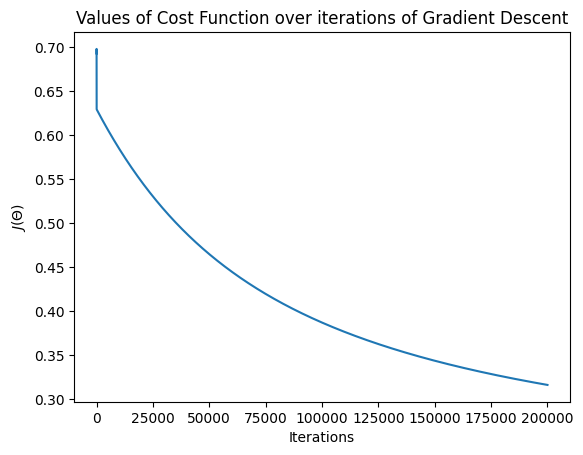

In [71]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Dibujemos la recta de decisión

$h_\theta(x) = \sigma(z)$, donde $\sigma$ es la función sigmoide y $z = \theta^Tx$

Cuando $h_\theta(x) \geq 0.5$ el modelo predice la clase "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predice clase "1"

Como, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ es la ecuación de la recta de decisión, tenemos que :

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

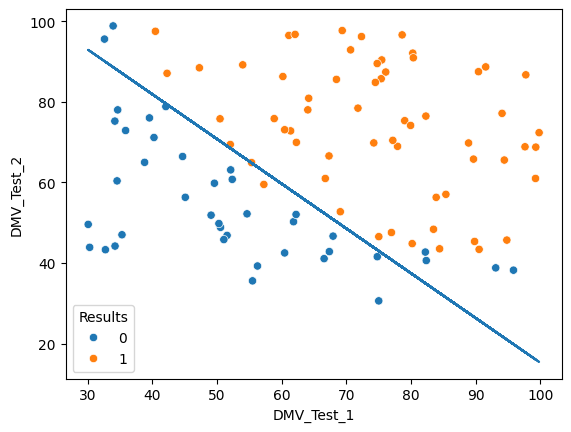

In [72]:
sns.scatterplot(x = 'DMV_Test_1', y = 'DMV_Test_2', hue = 'Results', data =data)
decision_boundary = -(theta[0] + (theta[1])*data['DMV_Test_1'])/(theta[2])
plt.plot(data['DMV_Test_1'], decision_boundary)

### Predicciones utilizando los valores $\theta$ encontrados

$h_\theta(x) = x\theta$

In [73]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [74]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 93 %


In [75]:
test = np.array([50,79])
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.62 probability of passing.


In [76]:
test = np.array([40,50])
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.13 probability of passing.


In [77]:
def predict(X, params):
    return np.round(logistic_function(X @ params))

In [78]:
y_pred = np.round(logistic_function(np.dot(X , theta)))

0.93
[[34  6]
 [ 1 59]]


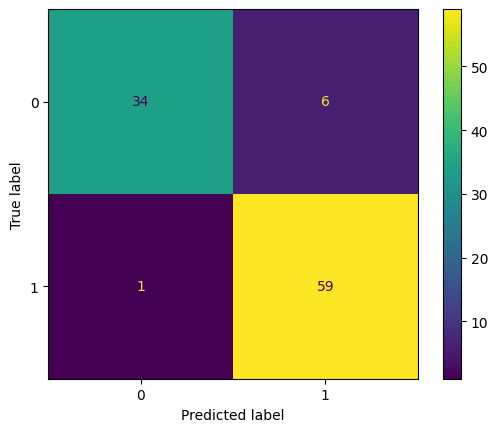

In [79]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

actual = y
predicted = predict(X, theta)
print(accuracy_score(actual, y_pred))
confusion_matrix = metrics.confusion_matrix(actual, predicted)
print(confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()